<a href="https://colab.research.google.com/github/Sushil211/Auto-Encoder-and-GAN/blob/master/conv_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [32]:
from tensorflow.keras.layers import Input, Conv2D, Dense, UpSampling2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.models import Model

In [33]:
#Encoder
in_layer = Input(shape=(28, 28))
reshape = Reshape(target_shape=(28, 28, 1))(in_layer)

conv = Conv2D(32, kernel_size=3, activation="tanh", padding="same")(reshape)
pool = MaxPooling2D()(conv)

conv = Conv2D(64, kernel_size=3, activation="tanh", padding="same")(pool)
pool = MaxPooling2D()(conv)

flat = Flatten()(pool)
out_layer = Dense(units=20, activation="sigmoid")(flat)

In [34]:
encoder = Model(in_layer, out_layer)
encoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0   

In [35]:
#Decoder
in_layer = Input(shape=(20,))
dense = Dense(units=7*7*64, activation="tanh")(in_layer)
reshape = Reshape(target_shape=(7, 7, 64))(dense)

conv = Conv2D(64, kernel_size=3, activation="tanh", padding="same")(reshape)
upsample = UpSampling2D()(conv)

conv = Conv2D(32, kernel_size=3, activation="tanh", padding="same")(upsample)
upsample = UpSampling2D()(conv)

conv = Conv2D(1, kernel_size=3, activation="sigmoid", padding="same")(upsample)
out_layer = Reshape(target_shape=(28, 28))(conv)

In [36]:
decoder = Model(in_layer, out_layer)

In [37]:
decoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3136)              65856     
_________________________________________________________________
reshape_7 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 28, 28, 32)        0   

In [38]:
in_layer = Input(shape=(28, 28))
encode_layer = encoder(in_layer)
decode_layer = decoder(encode_layer)

In [39]:
autoencoder = Model(in_layer, decode_layer)

In [40]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
model_6 (Model)              (None, 20)                81556     
_________________________________________________________________
model_7 (Model)              (None, 28, 28)            121537    
Total params: 203,093
Trainable params: 203,093
Non-trainable params: 0
_________________________________________________________________


In [41]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [42]:
autoencoder.fit(X, X, batch_size=1000, epochs=10)

Epoch 1/10
60/60 [==============================] - 5s 86ms/step - loss: 0.2940
Epoch 2/10
60/60 [==============================] - 5s 85ms/step - loss: 0.1812
Epoch 3/10
60/60 [==============================] - 5s 85ms/step - loss: 0.1465
Epoch 4/10
60/60 [==============================] - 5s 85ms/step - loss: 0.1336
Epoch 5/10
60/60 [==============================] - 5s 85ms/step - loss: 0.1245
Epoch 6/10
60/60 [==============================] - 5s 85ms/step - loss: 0.1209
Epoch 7/10
60/60 [==============================] - 5s 85ms/step - loss: 0.1184
Epoch 8/10
60/60 [==============================] - 5s 86ms/step - loss: 0.1157
Epoch 9/10
60/60 [==============================] - 5s 86ms/step - loss: 0.1131
Epoch 10/10
60/60 [==============================] - 5s 86ms/step - loss: 0.1122


In [43]:
out = autoencoder.predict(x_test[:5])

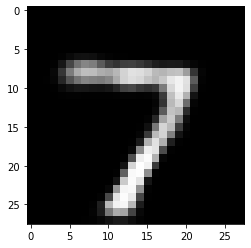

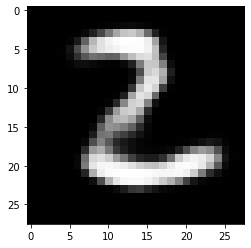

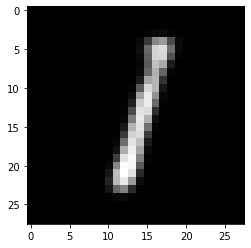

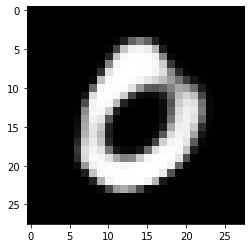

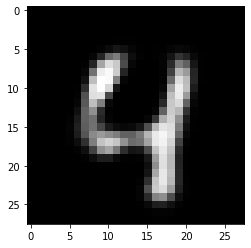

In [45]:
for i in range(5):
  plt.figure()
  plt.imshow(out[i], cmap="gray")
  plt.show()

<b>So we just extracted the whole picture from 20 useful features</b>